In [ ]:
# Install necessary libraries
!pip install facenet-pytorch
!pip install opencv-python
!pip install Pillow
!pip install matplotlib

In [ ]:
# Import necessary libraries
import os
import cv2
import numpy as np
import torch
from PIL import Image
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from google.colab import files
import matplotlib.pyplot as plt

Create directories to store uploaded images and embeddings.

In [ ]:
# Create directories to store uploaded images and embeddings
UPLOAD_FOLDER = '/content/drive/MyDrive/Attandance_tracking/uploaded_images'
EMBEDDING_FOLDER = '/content/drive/MyDrive/Attandance_tracking/embeddings'

if not os.path.exists(UPLOAD_FOLDER):
    os.makedirs(UPLOAD_FOLDER)
if not os.path.exists(EMBEDDING_FOLDER):
    os.makedirs(EMBEDDING_FOLDER)

In [ ]:
# Initialize MTCNN for face detection and InceptionResnetV1 for embeddings
face_detector = MTCNN(margin=20, post_process=False, select_largest=False)
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

Upload an image file from system

In [ ]:
# Upload an image file
uploaded = files.upload()

Saving Hariom.jpg to Hariom.jpg


File saved at /content/drive/MyDrive/Attandance_tracking/uploaded_images/Hariom.jpg


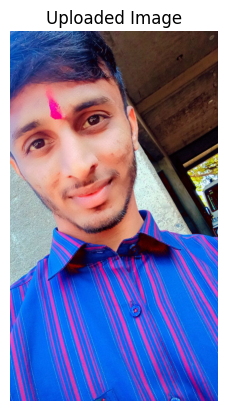

Embedding saved at /content/drive/MyDrive/Attandance_tracking/embeddings/Hariom_embedding_0.npy


In [ ]:
# Save and display the uploaded image
for file_name in uploaded.keys():
    # Save the uploaded image
    file_path = os.path.join(UPLOAD_FOLDER, file_name)
    with open(file_path, 'wb') as f:
        f.write(uploaded[file_name])
    print(f"File saved at {file_path}")

    # Display the uploaded image
    image = Image.open(file_path)
    plt.imshow(image)
    plt.title("Uploaded Image")
    plt.axis('off')
    plt.show()

    # Process image for face detection and embedding extraction
    image_rgb = np.array(image)

    # Detect faces in the image
    boxes, _ = face_detector.detect(image_rgb)

    if boxes is not None:
        for i, box in enumerate(boxes):
            face = extract_face(image_rgb, box).unsqueeze(0)
            embedding = face_embedder(face).detach().numpy().flatten()

            # Save the embedding
            embedding_file_path = os.path.join(EMBEDDING_FOLDER, f"{os.path.splitext(file_name)[0]}_embedding_{i}.npy")
            np.save(embedding_file_path, embedding)
            print(f"Embedding saved at {embedding_file_path}")
    else:
        print("No faces detected in the image.")